# Load Mining Masks

Author: duckworthd@

Example code showing one how to load mask.

In [1]:
# Set root directory to nearest parent folder for this file
import os
import sys

def git_root(current_dir=None):
    """Find root directory for a github repo above 'current_dir'.
    
    Args:
        current_dir: str. Path to directory within a git repo. 
            If None, defaults to the current working directory.
            
    Returns:
        Path to parent directory containing '.git'.
        
    Raises:
        ValueError: If no parent directory contains '.git'.
    """
    result = current_dir or os.getcwd()
    while True:
        if '.git' in os.listdir(result):
            return result
        if result == "/":
            raise ValueError("Could not find parent directory containing .git.")
        result = os.path.dirname(result)

def maybe_add_to_sys_path(path):
    """Add 'path' to 'sys.path' if it's not already there."""
    if path in sys.path:
        return
    sys.path.append(path)
    
maybe_add_to_sys_path(git_root())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ee; ee.Initialize()

from duckworthd import mining

%matplotlib inline

In [3]:
MINING_SITE_MASKS_ROOT = "/tmp/masks"

In [4]:
# Load metadata.

masks_metadata = mining.load_metadata(MINING_SITE_MASKS_ROOT)

In [5]:
# Load an image.

imgs = [
    mining.load_image(img_metadata, image_root=MINING_SITE_MASKS_ROOT) 
    for _, img_metadata in masks_metadata.iterrows()]
imgs = np.stack(imgs)
imgs.shape

(289, 100, 100, 1, 1)

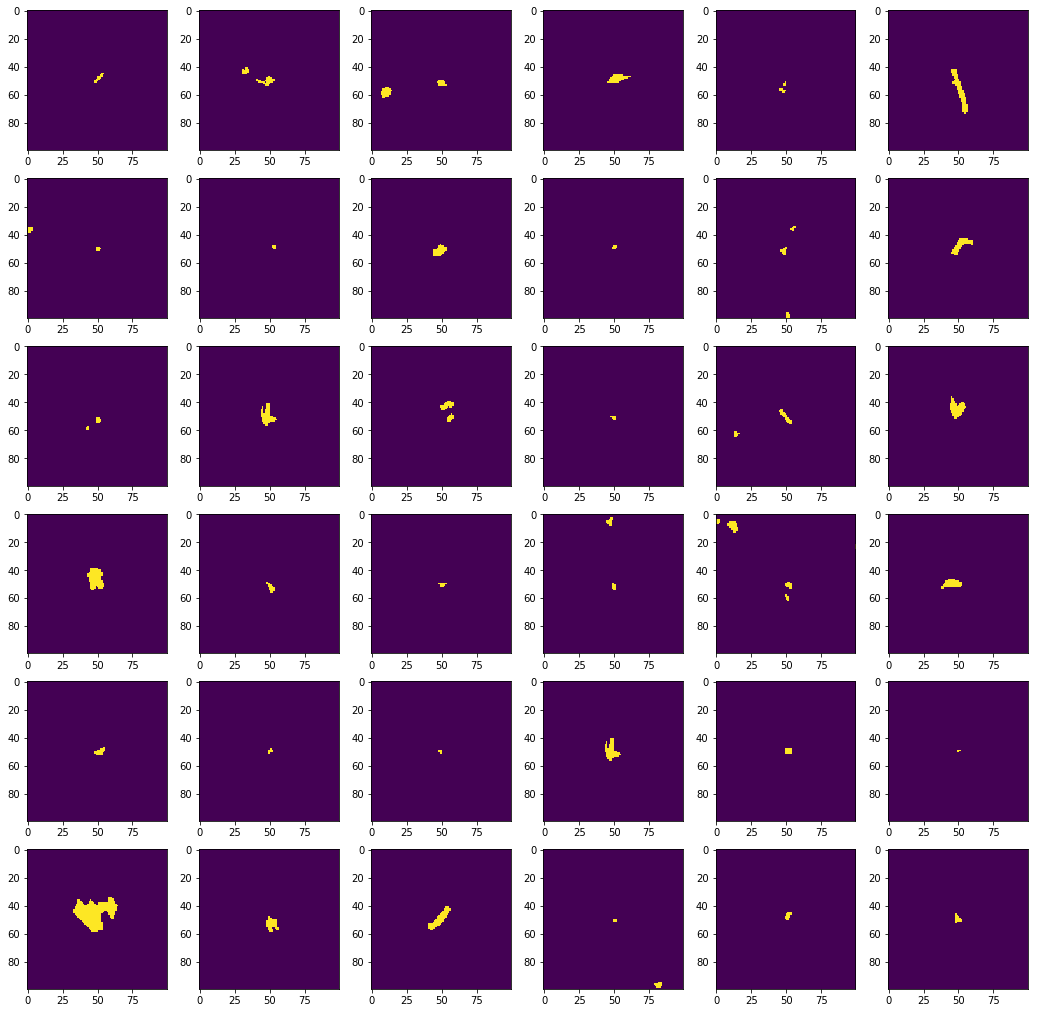

In [20]:
# Visualize mining site masks.

MAX_NUM_ROWS = 6

def divup(a, b):
    return int(np.ceil(a / b))

def plot_masks(imgs):
    num_imgs = imgs.shape[0]
    num_cols = 6
    num_rows = min(MAX_NUM_ROWS, divup(num_imgs, num_cols))

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 3,  num_rows * 3))

    for i, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[i,:,:,0,0])